In [1]:
#Some Basic Imports
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Input
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
np.random.seed(123)

import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.preprocessing import LabelBinarizer
import glob
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop
import argparse
import locale
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices: tf.config.experimental.set_memory_growth(device, True)
#Define Directories for train, test & Validation Set
image_folder = 'dataset2/'
image_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=False, class_mode='binary',
        target_size=(299,299), batch_size=437)

Found 431 images belonging to 2 classes.


In [2]:
image_generator.class_indices


{'covid': 0, 'no finding': 1}

In [3]:
images, labels = next(image_generator)

In [4]:
from sklearn.model_selection import train_test_split
# Using train_test_split to partition the training and testing structured data attributes and images
(trainImagesX,testImagesX,trainImagesY,testImagesY) = train_test_split(images,labels,test_size=0.25, random_state=32)

In [5]:
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='downloaded_weights/resnet50.h5', input_tensor=None,
    input_shape=(299, 299, 3), pooling=None, classes=2,
    classifier_activation='sigmoid'
)
base_model.summary()
#print(base_model.input)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
x = base_model.layers[-1].output
#x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
#predictions = Dense(1, activation= 'sigmoid')(x)
model1 = Model(inputs = base_model.input, outputs = x)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
model = Sequential()
model.add(model1)
model.add(Dense(512, activation='relu', input_dim=(299,299,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 204800)            23587712  
_________________________________________________________________
dropout (Dropout)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 204801    
Total params: 23,792,513
Trainable params: 23,739,393
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [9]:
from keras.optimizers import Adam, RMSprop
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=opt)
#cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 204800)            23587712  
_________________________________________________________________
dropout (Dropout)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 204801    
Total params: 23,792,513
Trainable params: 23,739,393
Non-trainable params: 53,120
_________________________________________________________________


In [10]:
model1_history = model.fit(trainImagesX, trainImagesY, validation_data=(testImagesX, testImagesY), epochs=50, batch_size=4,callbacks=callbacks_list)

Epoch 1/50
81/81 [==============================] - 23s 173ms/step - loss: 8.8142 - acc: 0.5929 - val_loss: 0.6931 - val_acc: 0.5093
Epoch 2/50
81/81 [==============================] - 10s 129ms/step - loss: 3.9924 - acc: 0.5602 - val_loss: 0.6931 - val_acc: 0.5093
Epoch 3/50
81/81 [==============================] - 10s 127ms/step - loss: 2.7099 - acc: 0.6066 - val_loss: 0.6931 - val_acc: 0.5093
Epoch 4/50
81/81 [==============================] - 11s 130ms/step - loss: 2.6241 - acc: 0.5459 - val_loss: 0.6931 - val_acc: 0.5093

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/50
81/81 [==============================] - 10s 128ms/step - loss: 2.0953 - acc: 0.6317 - val_loss: 0.6931 - val_acc: 0.5093
Epoch 6/50
81/81 [==============================] - 10s 128ms/step - loss: 1.2525 - acc: 0.5723 - val_loss: 0.6931 - val_acc: 0.5093
Epoch 7/50
81/81 [==============================] - 10s 128ms/step - loss: 1.1739 - acc: 0.6017 - val_loss: 0.6931 - val_

In [11]:
#model.save('models/mixed_model_resnetonly_v1_transfer_learning.h5')

In [11]:
def show_cf(y_true, y_pred, class_names, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [12]:
def cnn_evaluation(model, history, train_images, train_labels, test_images, test_labels, class_names, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    results_test = model.evaluate(test_images, test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_train_pred = np.round(model.predict(train_images))
    y_pred = np.round(model.predict(test_images))
    
    show_cf(test_labels, y_pred, class_names=class_names, model_name=model_name)
    
    print(classification_report(train_labels, y_train_pred))
    print(classification_report(test_labels, y_pred))

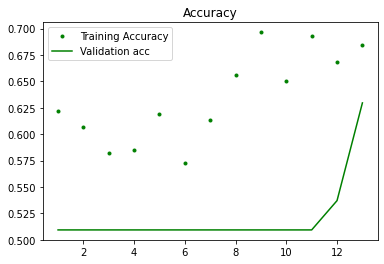

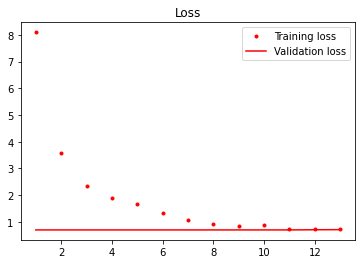

4/4 [==============================] - 4s 467ms/step - loss: 0.7037 - acc: 0.6296
Test Loss: 0.7037442326545715
Test Accuracy: 0.6296296119689941
              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71       177
         1.0       0.64      0.36      0.46       146

    accuracy                           0.62       323
   macro avg       0.63      0.60      0.58       323
weighted avg       0.63      0.62      0.59       323

              precision    recall  f1-score   support

         0.0       0.59      0.91      0.71        55
         1.0       0.78      0.34      0.47        53

    accuracy                           0.63       108
   macro avg       0.69      0.62      0.59       108
weighted avg       0.68      0.63      0.60       108



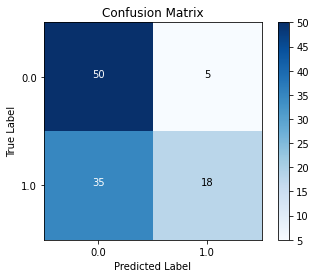

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
cnn_evaluation(model, model1_history, trainImagesX,trainImagesY,  testImagesX,testImagesY, class_names=['covid', 'no findings'])